In [2]:
#Using NumPy create random vector of size 15 having only Integers in the range 1-20.

import numpy as np    #importing numpy module
a = np.random.randint(1,21,15)      #np.random imports random function and randint method creates a array of size 15 elements varying between 1 to 20. 
a  #print 

array([12, 19,  9,  9, 19,  9, 11, 12,  3,  5,  9, 12, 12, 20,  7])

In [3]:
# Reshape the array to 3 by 5
a2 = a.reshape((3,5))     #reshape(3,5) method reshapes 1-D array into 2-D array with 3 rows and 5 columns
a2

array([[12, 19,  9,  9, 19],
       [ 9, 11, 12,  3,  5],
       [ 9, 12, 12, 20,  7]])

In [4]:
#Print array shape.
a2.shape   

(3, 5)

In [6]:
#Replace the max in each row by 0
a3 = np.where(a2 == a2.max(axis=1)[:,None], 0, a2)    
a3

array([[12,  0,  9,  9,  0],
       [ 9, 11,  0,  3,  5],
       [ 9, 12, 12,  0,  7]])

In [7]:
#Read the provided CSV file ‘data.csv’.

import pandas as pd
df = pd.read_csv('data.csv')     #reading csv file
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [8]:
#Show the basic statistical description about the data.

df.describe()   #describe() results statistical description of data in data frame

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [57]:
#Check if the data has null values.

df.isnull().any()  #check any column has null values

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

In [58]:
#Replace the null values with the mean

mean=df['Calories'].mean()
df['Calories'].fillna(value=mean, inplace=True)  #replacing Nan values with particular columns mean value

In [59]:
df.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

In [60]:
#Select at least two columns and aggregate the data using: min, max, count, mean.

df.agg({'Pulse' : ['min', 'max', 'count', 'mean'], 'Maxpulse' : ['min', 'max', 'count', 'mean'], 
        'Calories' : ['min', 'max', 'count', 'mean'] })
#agg method to aggreate operation on the dataframe

,Pulse,Maxpulse,Calories
min,80.000000,100.000000,50.300000
max,159.000000,184.000000,1860.400000
count,169.000000,169.000000,169.000000
mean,107.461538,134.047337,375.790244


In [61]:
#Filter the dataframe to select the rows with calories values between 500 and 1000. 

df[(df['Calories'] > 500) & (df['Calories'] < 1000)]   #'&' operator to filter the dataframe

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
90,180,101,127,600.1


In [62]:
#Filter the dataframe to select the rows with calories values > 500 and pulse < 100.

df[(df['Calories'] > 500) & (df['Pulse'] < 100)]   # '&' operator is used to filter the data 

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [63]:
#Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.

df_modified = df[['Duration', 'Pulse', 'Calories']].copy()  #copy method to create an another data frome with specified columns from the original dataframe.
df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [64]:
# Delete the “Maxpulse” column from the main df dataframe

df.pop('Maxpulse')   #pop method to remove a column from the data frame
df

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [72]:
df.dtypes

Duration      int64
Pulse         int64
Calories    float64
dtype: object

In [77]:
#Convert the datatype of Calories column to int datatype.

df['Calories'] = df['Calories'].astype(int)  #astype function converts one data type into another
df.dtypes

Duration    int64
Pulse       int64
Calories    int32
dtype: object

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

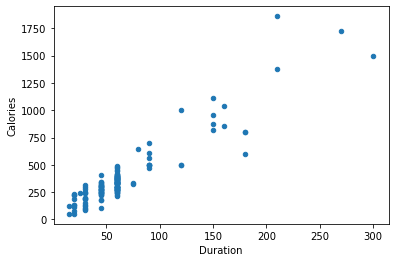

In [130]:
#Using pandas create a scatter plot for the two columns (Duration and Calories).
df.plot.scatter(x='Duration', y='Calories')

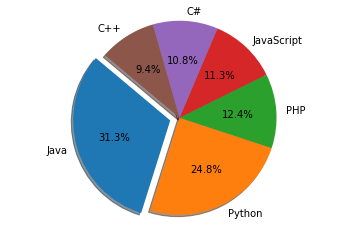

In [9]:
#Write a Python programming to create a below chart of the popularity of programming Languages.
#Sample data:
#Programming languages: Java, Python, PHP, JavaScript, C#, C++
#Popularity: 22.2, 17.6, 8.8, 8, 7.7, 6.7

import matplotlib.pyplot as plt
#languages_plotting
languages = 'Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++'
#popularity_plotting
popuratity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]
#colors_plotting
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]
# explode 1st slice
explode = (0.1, 0, 0, 0,0,0)
# Plot
plt.pie(popuratity, explode=explode, labels=languages, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()